In [1]:
import mne
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
mne.utils.use_log_level('error')

In [2]:
#subject = subject number
#testtype = VR or Non-VR
def loadRawData(subject, testtype):
    path = "Preprocessed_Data/Subject-"+str(subject)+"_"+testtype+".fif"
    raw = mne.io.read_raw_fif(path, verbose='error')
    return raw

def getFeatures(raw):
    col = ['Mean', 'Median', 'StdDev','Mean/StdDev','Skew','Kurt']
    features = pd.DataFrame(columns = col)
    for i in range(60,160,10):
        start, stop = raw.time_as_index([i, i+5])
        picks = mne.pick_types(raw.info, eeg=True, exclude=['CH 1','CH 2','CH 3','CH 5','CH 6','CH 7','CH 8'])
        try:    
            d, t = raw[picks[:], start:stop]
            ds = pd.DataFrame(d[0])
            
            #normalize
            #ds = (ds-ds.mean())/(ds.max()-ds.min())
            
            mean = ds.mean()[0]
            median = ds.median()[0]
            std = ds.std()[0]
            mos = mean/std
            skew = ds.skew()[0]
            kurt = ds.kurt()[0]
            features = features.append(pd.Series([mean, median, std, mos, skew, kurt], index=col), ignore_index=True)
        except:
            continue
    return features

In [3]:
columns = ['Subject','Test', 'Channel', 'Mean', 'Median', 'StdDev','Mean/StdDev','Skew','Kurt']

In [4]:
df = pd.DataFrame(columns = columns)
for i in range(1,33):
    data = loadRawData(i,"VR")
    f = getFeatures(data)
    l = len(f)
    for j in range(l):
        df = df.append(pd.Series([i, 'VR', 'CH 4', f['Mean'][j], f['Median'][j], f['StdDev'][j], f['Mean/StdDev'][j], f['Skew'][j], f['Kurt'][j]], index=columns), ignore_index=True)

In [5]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    print(df)

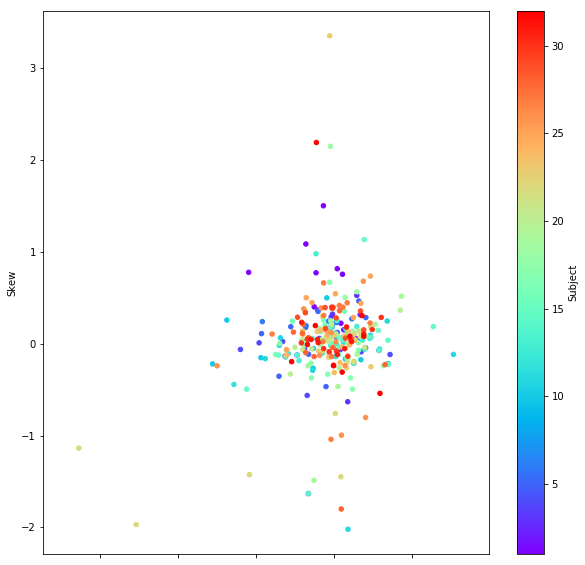

In [6]:
x = "Mean/StdDev"
y = "Skew"
c = "Subject"
df.plot.scatter(x=x, y=y, c=c, cmap='rainbow', figsize=[10,10])

In [7]:
import itertools

In [8]:
subs = df['Subject'].unique()    # All subjects
all_subs= list(itertools.combinations(subs, 2)) # All possible combination for all subjects

col = ['Subject','Distance','Type']
intra_data = pd.DataFrame(columns = col)

#Intra Distance Computation (Same Person)
for sub in subs:
    rows = df.loc[df['Subject'] == sub]
    each_comb = list(itertools.combinations(rows.index, 2))
    for i in range(len(each_comb)):
        comb = each_comb[i]
        x1= df.iloc[comb[0]][x]
        y1= df.iloc[comb[0]][y]
        x2 = df.iloc[comb[1]][x]
        y2 = df.iloc[comb[1]][y]
        Intra_dis = ((x1-y1)**2 + (x2-y2)**2) ** 0.5 # Euclidian distance formula
        intra_data = intra_data.append(pd.Series([sub, Intra_dis, 0], index=col), ignore_index=True)

In [9]:
col = ['Subjects','Distance','Type']
inter_data = pd.DataFrame(columns = col)

# Inter Distance Computation (Different Person) 
all_rows=len(df)
for sub_pair in all_subs: # Pairs of subjets
    sp1 = df.loc[df['Subject'] == sub_pair[0]].index
    sp2 = df.loc[df['Subject'] == sub_pair[1]].index
    for i in range(len(sp1)):
        for j in range(len(sp2)):
            x1 = df.iloc[sp1[i]][x] 
            y1 = df.iloc[sp1[i]][y]
            x2 = df.iloc[sp1[j]][x] 
            y2 = df.iloc[sp1[j]][y] 
            Inter_dis = ((x1-y1)**2 + (x2-y2)**2) ** 0.5 # Euclidian distance formula
            inter_data = inter_data.append(pd.Series([sub_pair, Inter_dis, 1], index=col), ignore_index=True)

In [10]:
print("Intra length: "+str(len(intra_data)))
print("Inter length: "+str(len(inter_data)))

Intra length: 1305
Inter length: 40600


In [11]:
intra_data

,Subject,Distance,Type
0,1.0,1.328249,0.0
1,1.0,1.099228,0.0
2,1.0,1.111094,0.0
3,1.0,0.786102,0.0
4,1.0,1.683150,0.0
5,1.0,0.757370,0.0
6,1.0,1.082917,0.0
7,1.0,0.756249,0.0
8,1.0,0.856786,0.0
9,1.0,1.354420,0.0


In [12]:
inter_data

,Subjects,Distance,Type
0,"(1, 2)",1.066816,1
1,"(1, 2)",1.328249,1
2,"(1, 2)",1.099228,1
3,"(1, 2)",1.111094,1
4,"(1, 2)",0.786102,1
5,"(1, 2)",1.683150,1
6,"(1, 2)",0.757370,1
7,"(1, 2)",1.082917,1
8,"(1, 2)",0.756249,1
9,"(1, 2)",0.856786,1
